## to_datetime
판다스의 to_datetime 함수는 문자열, 숫자, 리스트 등의 형태로 된 날짜와 시간 데이터를 파이썬의 datetime 객체로 변환하는데 사용됩니다. 이 함수는 다양한 형태의 날짜와 시간 포맷을 인식하고, 필요에 따라 적절한 날짜/시간 객체로 변환할 수 있습니다. to_datetime 함수는 데이터 분석에서 날짜와 시간 데이터를 처리할 때 매우 유용합니다.

### 1. format
문자열 날짜 데이터의 포맷을 지정합니다. 예를 들어, '%Y-%m-%d'는 '2024-01-26'과 같은 형식을 나타냅니다.
* %Y: 4자리 연도 (예: 2024)
* %y: 2자리 연도 (예: 24)
* %m: 2자리 월 (01 ~ 12)
* %d: 2자리 일 (01 ~ 31)
* %H: 24시간제 시간 (00 ~ 23)
* %I: 12시간제 시간 (01 ~ 12)
* %M: 2자리 분 (00 ~ 59)
* %S: 2자리 초 (00 ~ 59)
* %f: 마이크로초 (000000 ~ 999999)
* %p: 오전/오후 지시자 (AM/PM) (영어 환경에서 사용)
* %A: 요일의 전체 이름 (예: Sunday)
* %a: 요일의 축약된 이름 (예: Sun)
* %B: 월의 전체 이름 (예: January)
* %b 또는 %h: 월의 축약된 이름 (예: Jan)
* %j: 연중 일수 (001 ~ 366)
* %U: 연중 주수 (일요일 시작, 00 ~ 53)
* %W: 연중 주수 (월요일 시작, 00 ~ 53)
* %w: 요일 (0 = 일요일, 6 = 토요일)
* %Z: 시간대 이름 (예: EST, CST)

In [3]:
import pandas as pd

data = {
    'datetime_str': [
        '2024-01-26 15:30:59.123456 PM',
        '2024-01-27 03:15:45.654321 AM',
        '2024-01-28 12:00:00.000000 AM',
        '2024-01-29 23:59:59.999999 PM'
    ]
}

df = pd.DataFrame(data)
pd.to_datetime(df['datetime_str'], format="%Y-%m-%d %H:%M:%S.%f %p")

0   2024-01-26 15:30:59.123456
1   2024-01-27 03:15:45.654321
2   2024-01-28 12:00:00.000000
3   2024-01-29 23:59:59.999999
Name: datetime_str, dtype: datetime64[ns]

### 2. errors
errors: 변환 중 오류가 발생할 때의 처리 방법을 지정합니다. 'ignore', 'raise'(기본값), 'coerce'(오류가 있는 경우 NaT로 변환) 중 선택할 수 있습니다.

In [11]:
data_with_errors = {
    'date_str': [
        '2024-01-26',
        '2024-02-30',
        '2024-13-01'
    ]
}

df_with_errors = pd.DataFrame(data_with_errors)
pd.to_datetime(df_with_errors['date_str'],errors='ignore') # 수정하지 않고 그냥 출력해서 object 타입

0    2024-01-26
1    2024-02-30
2    2024-13-01
Name: date_str, dtype: object

In [13]:
pd.to_datetime(df_with_errors['date_str'],errors='coerce') # 에러는 NaT 로 해서 datetime 타입이 됨

0   2024-01-26
1          NaT
2          NaT
Name: date_str, dtype: datetime64[ns]

In [14]:
pd.to_datetime(['2020-01-04', '2020-01-05','2020-01-06'])

DatetimeIndex(['2020-01-04', '2020-01-05', '2020-01-06'], dtype='datetime64[ns]', freq=None)

### 3. 연습문제
1. '2024-02-15' 문자열을 datetime 객체로 변환하세요.

In [18]:
pd.to_datetime(['2024-02-15'])

DatetimeIndex(['2024-02-15'], dtype='datetime64[ns]', freq=None)

2. '2024-02-15 20:30:45' 문자열을 datetime 객체로 변환하세요.

In [19]:
pd.to_datetime(['2024-02-15 20:30:45'])

DatetimeIndex(['2024-02-15 20:30:45'], dtype='datetime64[ns]', freq=None)

3. '15/02/2024' 문자열을 datetime 객체로 변환하세요. 날짜 포맷은 일/월/연도입니다.

In [21]:
pd.to_datetime(['15/02/2024'],format='%d/%m/%Y')

DatetimeIndex(['2024-02-15'], dtype='datetime64[ns]', freq=None)

4. '02/15/2024 08:30 PM' 문자열을 datetime 객체로 변환하세요. 시간은 12시간제로 주어집니다.

In [35]:
pd.to_datetime(['02/15/2024 08:30 PM'],format='%m/%d/%Y %I:%M %p')

DatetimeIndex(['2024-02-15 20:30:00'], dtype='datetime64[ns]', freq=None)

5. '2024-02-30' 문자열을 datetime 객체로 변환하되, 유효하지 않은 날짜는 NaT으로 처리하세요.

In [25]:
pd.to_datetime(['2024-02-15 20:30:45'], errors='coerce')

DatetimeIndex(['2024-02-15 20:30:45'], dtype='datetime64[ns]', freq=None)

6. ['2024-02-15', '2024-02-16', '2024-02-17'] 리스트에 있는 날짜 문자열들을 datetime 객체로 변환하세요.

In [26]:
pd.to_datetime(['2024-02-15', '2024-02-16', '2024-02-17'])

DatetimeIndex(['2024-02-15', '2024-02-16', '2024-02-17'], dtype='datetime64[ns]', freq=None)

7. '2024-02-15 25:30:45' 문자열을 datetime 객체로 변환하되, 유효하지 않은 시간은 NaT으로 처리하세요.

In [29]:
pd.to_datetime(['2024-02-15 25:30:45'],format="%Y-%m-%d %H:%M:%S", errors='coerce')

DatetimeIndex(['NaT'], dtype='datetime64[ns]', freq=None)

8. 'This is not a date' 문자열을 datetime 객체로 변환하되, 오류가 발생하면 이를 무시하고 진행하세요.

In [30]:
pd.to_datetime(['This is not a date'], errors='ignore')

Index(['This is not a date'], dtype='object')

9. '2024-02-15 20:30:45.123456' 문자열을 datetime 객체로 변환하세요. 이 문자열은 마이크로초까지 포함하고 있습니다.

In [31]:
pd.to_datetime(['2024-02-15 20:30:45.123456'],format="%Y-%m-%d %H:%M:%S.%f")

DatetimeIndex(['2024-02-15 20:30:45.123456'], dtype='datetime64[ns]', freq=None)

10. '2024-02-15 20:30'와 같이 날짜와 시간이 포함된 문자열이 있습니다. 이 문자열을 datetime 객체로 변환하세요.

In [33]:
pd.to_datetime(['2024-02-15 20:30'],format="%Y-%m-%d %H:%M")

DatetimeIndex(['2024-02-15 20:30:00'], dtype='datetime64[ns]', freq=None)

In [46]:
samsung = pd.read_csv("실습 파일/samsung.csv")
samsung

,date,open,high,low,close,volume
0,1985-01-04,130,130,129,129,111765
1,1985-01-05,129,129,128,128,108497
2,1985-01-07,129,130,128,129,771895
3,1985-01-08,129,129,127,127,845098
4,1985-01-09,126,126,122,123,324837
...,...,...,...,...,...,...
10101,2023-04-24,65300,65700,64800,65200,12986581
10102,2023-04-25,65300,65400,63400,63600,16193271
10103,2023-04-26,63600,64300,63300,64100,12664541
10104,2023-04-27,64100,65000,63300,64600,14779601


In [47]:
samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10106 entries, 0 to 10105
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    10106 non-null  object
 1   open    10106 non-null  int64 
 2   high    10106 non-null  int64 
 3   low     10106 non-null  int64 
 4   close   10106 non-null  int64 
 5   volume  10106 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 473.8+ KB


In [48]:
samsung['date'] = pd.to_datetime(samsung['date'])
samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10106 entries, 0 to 10105
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10106 non-null  datetime64[ns]
 1   open    10106 non-null  int64         
 2   high    10106 non-null  int64         
 3   low     10106 non-null  int64         
 4   close   10106 non-null  int64         
 5   volume  10106 non-null  int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 473.8 KB


In [49]:
# index로 to_datetime 하지 않고 가면 정렬이 잘안될 수도 있음
# 꼭 datetime 하고 가기
samsung = samsung.set_index('date')
samsung = samsung.sort_index()
samsung

,open,high,low,close,volume
date,,,,,
1985-01-04,130,130,129,129,111765
1985-01-05,129,129,128,128,108497
1985-01-07,129,130,128,129,771895
1985-01-08,129,129,127,127,845098
1985-01-09,126,126,122,123,324837
...,...,...,...,...,...
2023-04-24,65300,65700,64800,65200,12986581
2023-04-25,65300,65400,63400,63600,16193271
2023-04-26,63600,64300,63300,64100,12664541


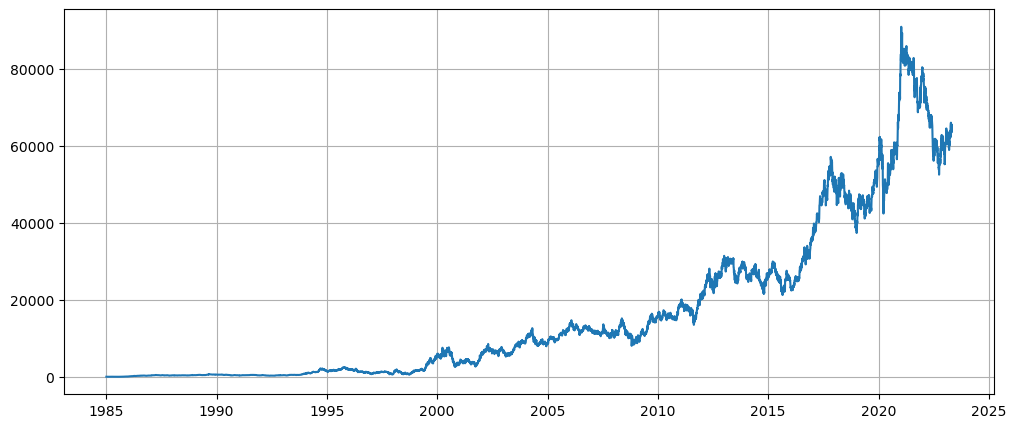

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,5))
plt.plot(samsung['close'])
plt.grid()
plt.show()

In [55]:
# 5일치 평균 / 20일치 / 120일치 순으로 있으면 상승그래프
# 3일치 평균값

samsung['close'].rolling(window=3).mean() 

date
1985-01-04             NaN
1985-01-05             NaN
1985-01-07      128.666667
1985-01-08      128.000000
1985-01-09      126.333333
                  ...     
2023-04-24    65400.000000
2023-04-25    64833.333333
2023-04-26    64300.000000
2023-04-27    64100.000000
2023-04-28    64733.333333
Name: close, Length: 10106, dtype: float64

In [58]:
# 한 칸씩 내려가라
samsung['close'].shift(1)
samsung['close']-samsung['close'].shift(1)

date
1985-01-04       NaN
1985-01-05      -1.0
1985-01-07       1.0
1985-01-08      -2.0
1985-01-09      -4.0
               ...  
2023-04-24    -500.0
2023-04-25   -1600.0
2023-04-26     500.0
2023-04-27     500.0
2023-04-28     900.0
Name: close, Length: 10106, dtype: float64

In [60]:
samsung.close.diff()

date
1985-01-04       NaN
1985-01-05      -1.0
1985-01-07       1.0
1985-01-08      -2.0
1985-01-09      -4.0
               ...  
2023-04-24    -500.0
2023-04-25   -1600.0
2023-04-26     500.0
2023-04-27     500.0
2023-04-28     900.0
Name: close, Length: 10106, dtype: float64

In [61]:
samsung.close.pct_change()*100

date
1985-01-04         NaN
1985-01-05   -0.775194
1985-01-07    0.781250
1985-01-08   -1.550388
1985-01-09   -3.149606
                ...   
2023-04-24   -0.761035
2023-04-25   -2.453988
2023-04-26    0.786164
2023-04-27    0.780031
2023-04-28    1.393189
Name: close, Length: 10106, dtype: float64

#### 한국 주식 시가총액 TOP 100 데이터
##### 100개의 주식 데이터 중에서 5, 20, 60, 120일의 이동평균선을 계산하고, 가장 최신 날짜의 데이터를 확인하여 이동평균선의 값이 120 < 60 < 20 < 5일인 주식명을 모두 출력하세요.

In [92]:
import numpy as np

In [65]:
import pickle
with open("실습 파일/stock_data.dat", 'rb') as file:
    data = pickle.load(file)

In [80]:
for i,j in data.items():
    print(i,j)

삼성전자              Open   High    Low  Close    Volume    Change
Date                                                      
1999-10-08   4080   4090   3970   4000    834553       NaN
1999-10-11   3960   4010   3899   3900    616634 -0.025000
1999-10-12   3900   4070   3900   4070    792332  0.043590
1999-10-13   4000   4190   3980   4160    650974  0.022113
1999-10-14   4120   4220   4080   4160    715071  0.000000
...           ...    ...    ...    ...       ...       ...
2024-01-22  75900  76000  75000  75100  19673375  0.005355
2024-01-23  75700  75800  74300  75200  14786224  0.001332
2024-01-24  75200  75200  73500  74000  12860661 -0.015957
2024-01-25  74200  74800  73700  74100  11737747  0.001351
2024-01-26  73700  74500  73300  73900   8349410 -0.002699

[6000 rows x 6 columns]
SK하이닉스               Open    High     Low   Close    Volume    Change
Date                                                          
1999-10-08  520163  520163  488207  495308   8904080       NaN
1999-10

In [102]:
box = []
for i in data:
    data[i]['Company']= i
    box.append(data[i])
df_stock = pd.concat(box)
df_stock = df_stock[['Company','Open','High','Low','Close','Volume','Change']]
df_stock

,Company,Open,High,Low,Close,Volume,Change
Date,,,,,,,
1999-10-08,삼성전자,4080,4090,3970,4000,834553,NaN
1999-10-11,삼성전자,3960,4010,3899,3900,616634,-0.025000
1999-10-12,삼성전자,3900,4070,3900,4070,792332,0.043590
1999-10-13,삼성전자,4000,4190,3980,4160,650974,0.022113
1999-10-14,삼성전자,4120,4220,4080,4160,715071,0.000000
...,...,...,...,...,...,...,...
2024-01-22,리노공업,214500,238500,211000,234000,517917,0.114286
2024-01-23,리노공업,229000,236000,224500,230000,251698,-0.017094
2024-01-24,리노공업,227500,231000,215500,224000,205505,-0.026087


In [136]:
# concat 후에 하면 위험함!!! 
# 다른 기업의 이동평균값이 들어가져서
# 요렇게 하면 안된답니다~
df_stock['MA5'] = df_stock['Close'].rolling(window=5).mean()
df_stock['MA20'] = df_stock['Close'].rolling(window=20).mean() 
df_stock['MA60'] = df_stock['Close'].rolling(window=60).mean() 
df_stock['MA120'] = df_stock['Close'].rolling(window=120).mean()
df_stock

,Company,Open,High,Low,Close,Volume,Change,MA5,MA20,MA60,MA120
Date,,,,,,,,,,,
1999-10-08,삼성전자,4080,4090,3970,4000,834553,NaN,NaN,NaN,NaN,NaN
1999-10-11,삼성전자,3960,4010,3899,3900,616634,-0.025000,NaN,NaN,NaN,NaN
1999-10-12,삼성전자,3900,4070,3900,4070,792332,0.043590,NaN,NaN,NaN,NaN
1999-10-13,삼성전자,4000,4190,3980,4160,650974,0.022113,NaN,NaN,NaN,NaN
1999-10-14,삼성전자,4120,4220,4080,4160,715071,0.000000,4058.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-22,리노공업,214500,238500,211000,234000,517917,0.114286,207740.0,206935.0,186835.000000,173409.166667
2024-01-23,리노공업,229000,236000,224500,230000,251698,-0.017094,214040.0,208335.0,188161.666667,173971.666667
2024-01-24,리노공업,227500,231000,215500,224000,205505,-0.026087,219420.0,209585.0,189406.666667,174426.666667


In [135]:
sample = df_stock[(df_stock['MA5']>df_stock['MA20'])&(df_stock['MA20']>df_stock['MA60'])&(df_stock['MA60']>df_stock['MA120'])]
sample.loc['2024-01-26']

,Company,Open,High,Low,Close,Volume,Change,MA5,MA20,MA60,MA120
Date,,,,,,,,,,,
2024-01-26,SK하이닉스,136200,138600,136000,136600,2308034,-0.005822,139780.0,137260.0,133676.666667,126638.333333
2024-01-26,신한지주,39300,40050,39300,39900,557344,0.006305,39150.0,37792.5,37115.000000,36374.583333
2024-01-26,카카오뱅크,29050,29850,28950,29300,681624,0.001709,28980.0,28355.0,26189.333333,25372.666667
2024-01-26,하나금융지주,43750,45050,43650,44750,1011886,0.022857,43250.0,42102.5,41800.000000,41301.666667
2024-01-26,메리츠금융지주,62300,63800,62100,63500,297363,0.019262,62000.0,59400.0,56890.000000,54577.916667
2024-01-26,HLB,55400,65000,54500,62600,13970607,0.144424,53130.0,48830.0,39824.166667,34894.166667
2024-01-26,한화에어로스페이스,139600,143300,139300,141500,210634,0.007117,143080.0,137230.0,129113.333333,119127.500000
2024-01-26,카카오페이,51000,52800,50800,51700,131701,0.003883,51640.0,51435.0,47049.166667,45065.833333
2024-01-26,SK스퀘어,49000,50500,48750,50100,71977,0.005015,50210.0,49305.0,49019.166667,46318.750000


In [134]:
upper_ma = []
    
for ticker in data.keys():
    df = data[ticker]
    
    MA5 = df['Close'].rolling(window = 5).mean()[-1]
    MA20 = df['Close'].rolling(window = 20).mean()[-1]
    MA60 = df['Close'].rolling(window = 60).mean()[-1]
    MA120 = df['Close'].rolling(window = 120).mean()[-1]

    if (MA5>MA20) & (MA20>MA60) & (MA60>MA120):
        upper_ma.append(ticker)
    
upper_ma


['SK하이닉스',
 '신한지주',
 '카카오뱅크',
 '하나금융지주',
 '메리츠금융지주',
 'HLB',
 '한화에어로스페이스',
 '카카오페이',
 'SK스퀘어',
 '한국타이어앤테크놀로지',
 '한국항공우주',
 '코웨이',
 '현대차2우B',
 'HPSP',
 'HD현대일렉트릭',
 '리노공업']

In [143]:
import koreanize_matplotlib

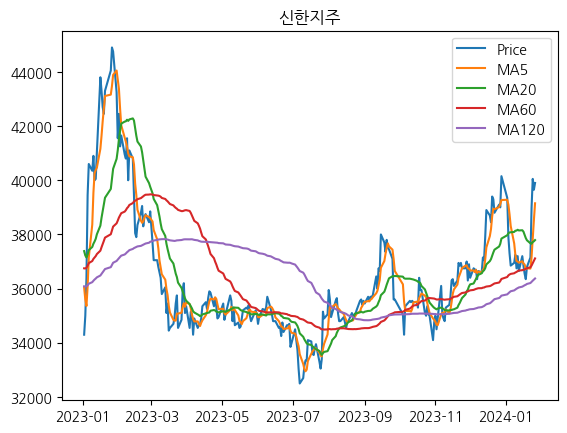

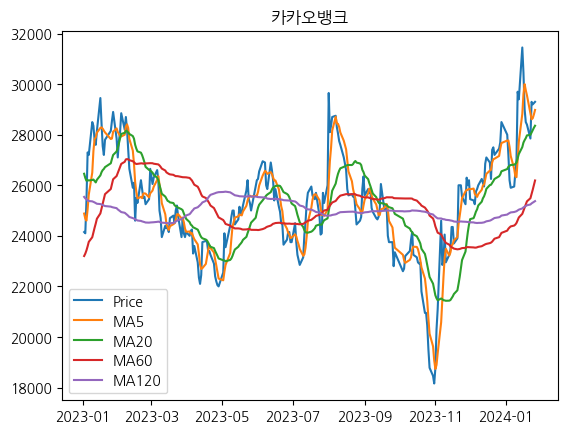

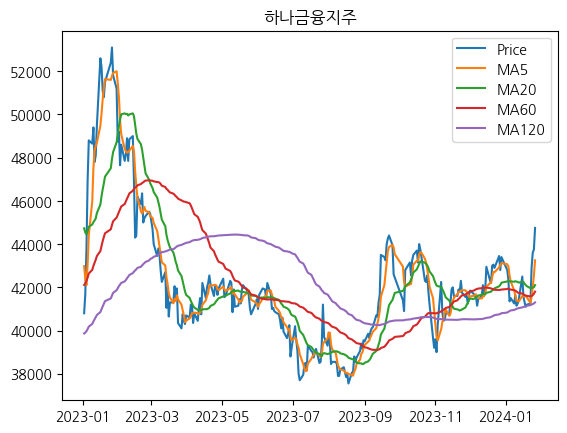

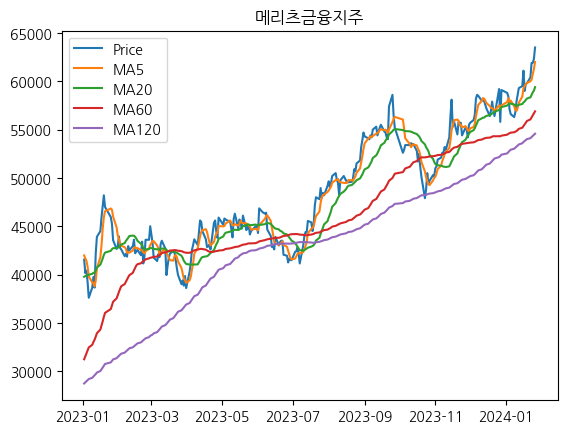

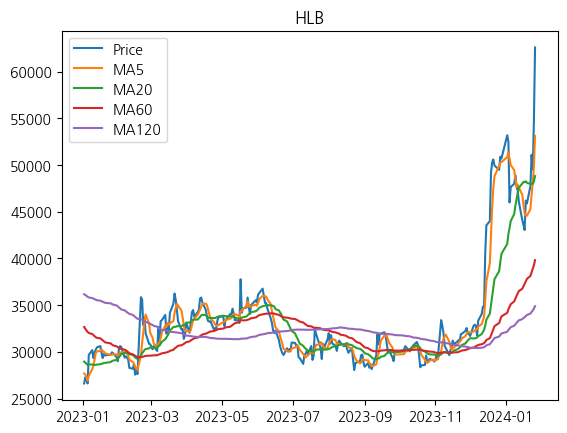

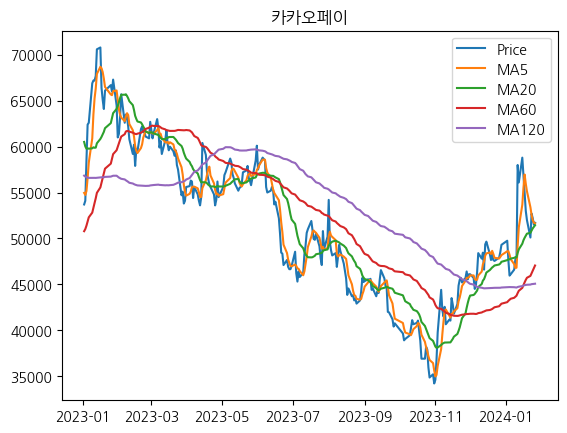

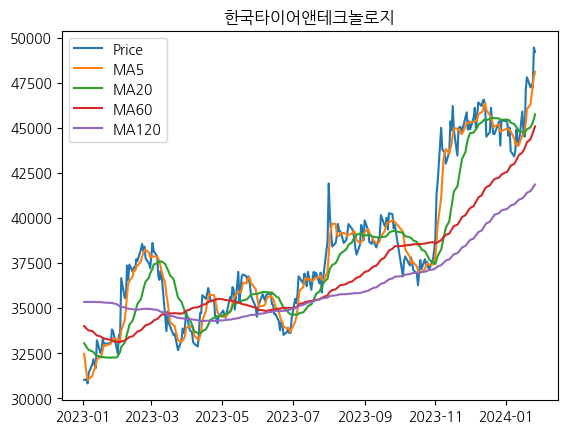

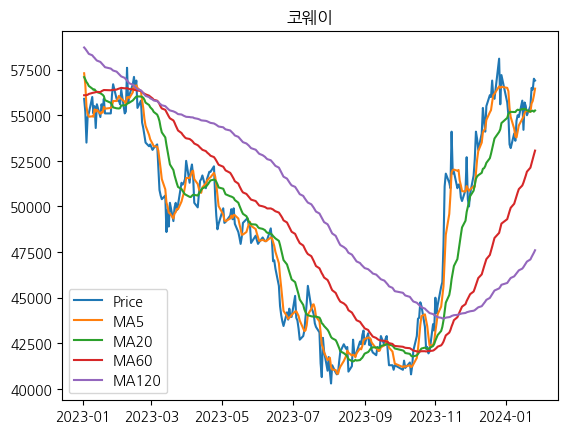

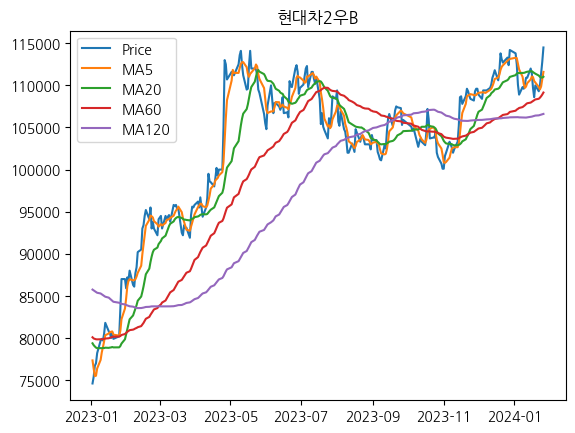

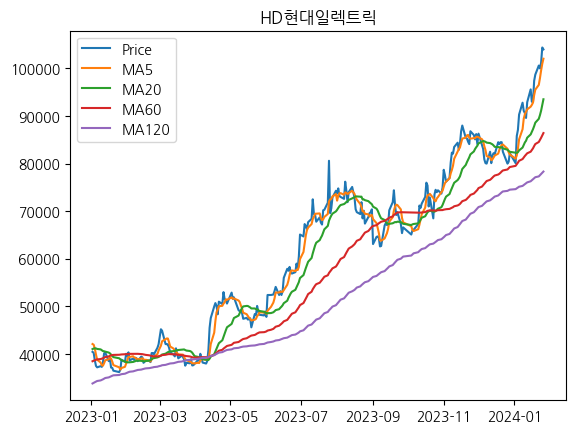

In [150]:
for company in data:
    df_stock = data[company]
    
    df_stock['MA5'] = df_stock['Close'].rolling(window=5).mean()
    df_stock['MA20'] = df_stock['Close'].rolling(window=20).mean() 
    df_stock['MA60'] = df_stock['Close'].rolling(window=60).mean() 
    df_stock['MA120'] = df_stock['Close'].rolling(window=120).mean()

    today = df_stock.iloc[-1]
    if today['MA120']<today['MA60']<today['MA20']<today['MA5']<today['Close']:
        df_stock=df_stock[df_stock.index.year>=2023]
        
        plt.figure()
        plt.plot(df_stock['Close'])
        plt.plot(df_stock['MA5'])
        plt.plot(df_stock['MA20'])
        plt.plot(df_stock['MA60'])
        plt.plot(df_stock['MA120'])
        plt.legend(['Price','MA5','MA20','MA60','MA120'])
        plt.title(f"{company}")
        plt.savefig(f"생성 파일/상승하고 있는 주식/{company}.png")

In [ ]:
z